## Online Retailer Performance Analysis

### Project Scope

• Imagine that you have been tasked with helping an online retailer measure and analyze their website’s
performance

• The retailer uses Google Analytics (GA) to track engagement and conversion on their website

• You have been given two GA datasets containing basic ecommerce metrics and asked to summarize
website performance and provide insights to help the retailer understand their website’s performance

### Datasets
• Two csv files are attached:

– sessionCounts.csv: sessions, transactions, and QTY broken out by browser * deviceCategory *
date

– addsToCart.csv: addsToCart broken out by month


In [1]:
# Importing important libraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings 
warnings.filterwarnings('ignore')

In [2]:
# Reading the data tables

session_data = pd.read_csv('DataAnalyst_Ecom_data_sessionCounts.csv', parse_dates=True)
tocart_data = pd.read_csv('DataAnalyst_Ecom_data_addsToCart.csv')

## Analysing the sessions dataset

In [3]:
session_data.head()

,dim_browser,dim_deviceCategory,dim_date,sessions,transactions,QTY
0,Safari,tablet,7/1/12,2928,127,221
1,Internet Explorer,desktop,7/1/12,1106,28,0
2,Chrome,tablet,7/1/12,474,3,13
3,Amazon Silk,tablet,7/1/12,235,4,5
4,Internet Explorer,mobile,7/1/12,178,6,11


In [4]:
session_data.tail()

,dim_browser,dim_deviceCategory,dim_date,sessions,transactions,QTY
7729,Internet Explorer,tablet,6/30/13,6,0,0
7730,error,desktop,6/30/13,5,0,0
7731,Edge,mobile,6/30/13,4,0,0
7732,SeaMonkey,desktop,6/30/13,3,0,0
7733,Puffin,desktop,6/30/13,1,0,0


In [5]:
tocart_data.head()

,dim_year,dim_month,addsToCart
0,2012,7,191504
1,2012,8,217666
2,2012,9,123726
3,2012,10,139803
4,2012,11,186572


In [6]:
tocart_data.tail()

,dim_year,dim_month,addsToCart
7,2013,2,135882
8,2013,3,109797
9,2013,4,183842
10,2013,5,136720
11,2013,6,107970


In [7]:
# Checking for missing values

session_data.isna().sum()

dim_browser           0
dim_deviceCategory    0
dim_date              0
sessions              0
transactions          0
QTY                   0
dtype: int64

In [8]:
# Checking the datatypes for the data columns

session_data.dtypes

dim_browser           object
dim_deviceCategory    object
dim_date              object
sessions               int64
transactions           int64
QTY                    int64
dtype: object

In [9]:
# Converting the dim-date column to datetime

session_data['dim_date'] = pd.to_datetime(session_data['dim_date'])
session_data.head(4)

,dim_browser,dim_deviceCategory,dim_date,sessions,transactions,QTY
0,Safari,tablet,2012-07-01,2928,127,221
1,Internet Explorer,desktop,2012-07-01,1106,28,0
2,Chrome,tablet,2012-07-01,474,3,13
3,Amazon Silk,tablet,2012-07-01,235,4,5


####  Exploritory data analysis on the numerical columns

In [10]:
session_data.describe().T

,count,mean,std,min,25%,50%,75%,max
sessions,7734.0,1347.157099,3623.452668,0.0,3.0,23.0,772.0,43559.0
transactions,7734.0,32.280191,98.297805,0.0,0.0,0.0,9.0,1398.0
QTY,7734.0,58.291958,184.775650,0.0,0.0,0.0,12.0,2665.0


The average number of user sessions for the 2012-2013 year is 1347 with the minimum and maximum number of sessions as 0 and 43559 repectively. The averege number of transactions were 32 with a maximum of 1398. 

The sessions, transactions and Quantity data are analysed by the following plots below. Their datasets are aggregated weekly.

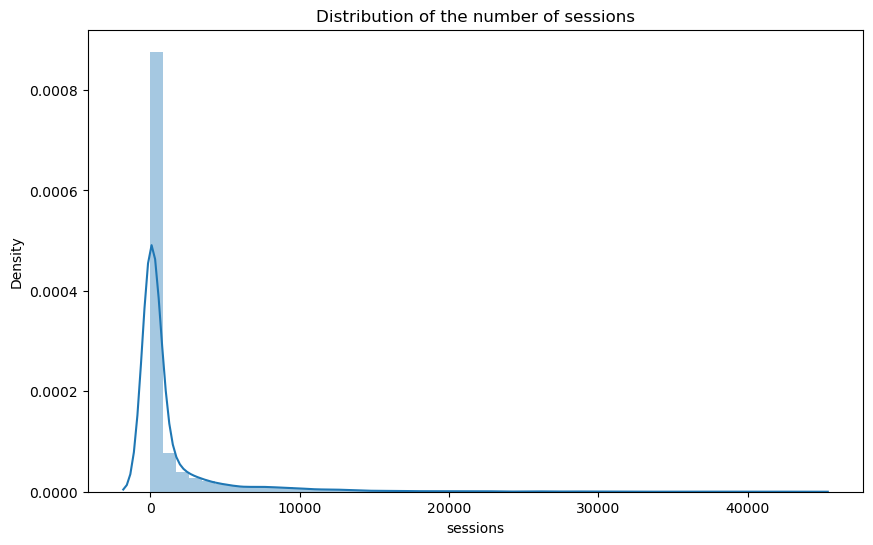

In [11]:
plt.figure(figsize=(10,6))
plt.title('Distribution of the number of sessions')
sns.distplot(session_data['sessions'], bins=50);

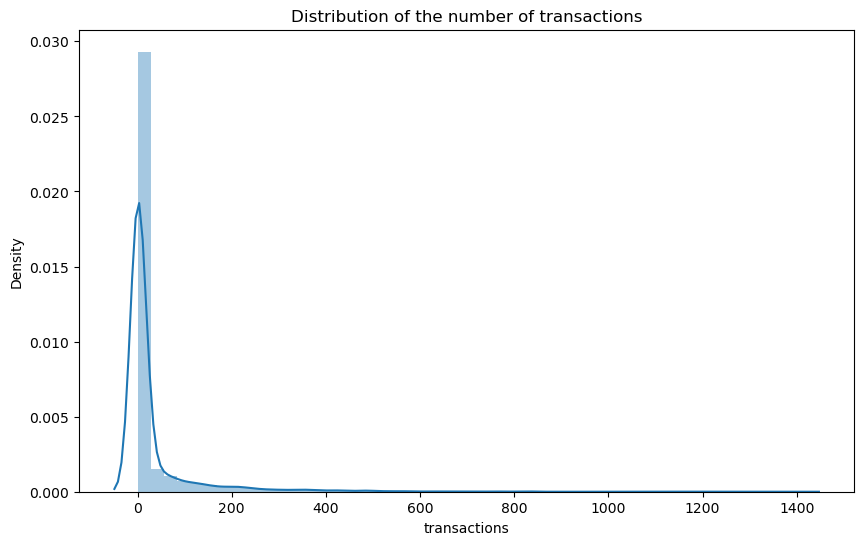

In [12]:
plt.figure(figsize=(10,6))
plt.title('Distribution of the number of transactions')
sns.distplot(session_data['transactions'], bins=50);

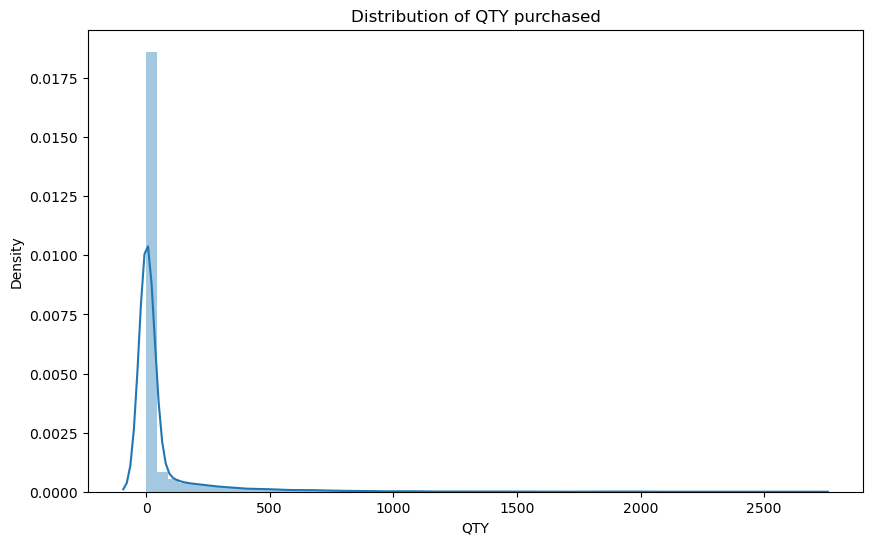

In [13]:
plt.figure(figsize=(10,6))
plt.title('Distribution of QTY purchased')
sns.distplot(session_data['QTY'], bins=60);

The data for all of the numerical columns appear skewed with more of the data centered around zero. More people on a daily basis visiting the site did not make any purchase perharps becasue they were surfing the website to make a decision later on whether or not to make a purchase.

In [14]:
# Resampling the data weekly

df_plot = session_data.set_index('dim_date').resample('W').mean()

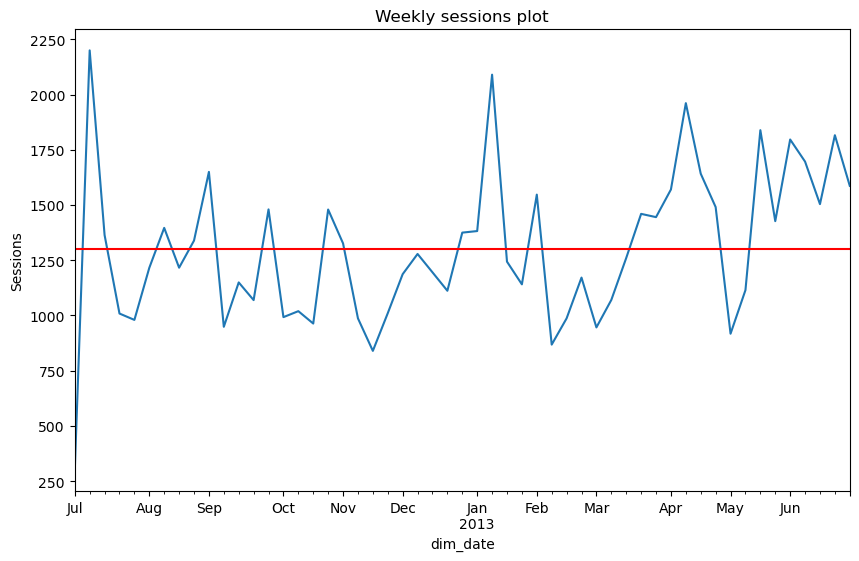

In [15]:
plt.figure(figsize=(10,6))
plt.title('Weekly sessions plot')
plt.xlabel('Date')
plt.ylabel('Sessions')
df_plot['sessions'].plot(kind='line');
plt.axhline(df_plot['sessions'].mean(), color='r');

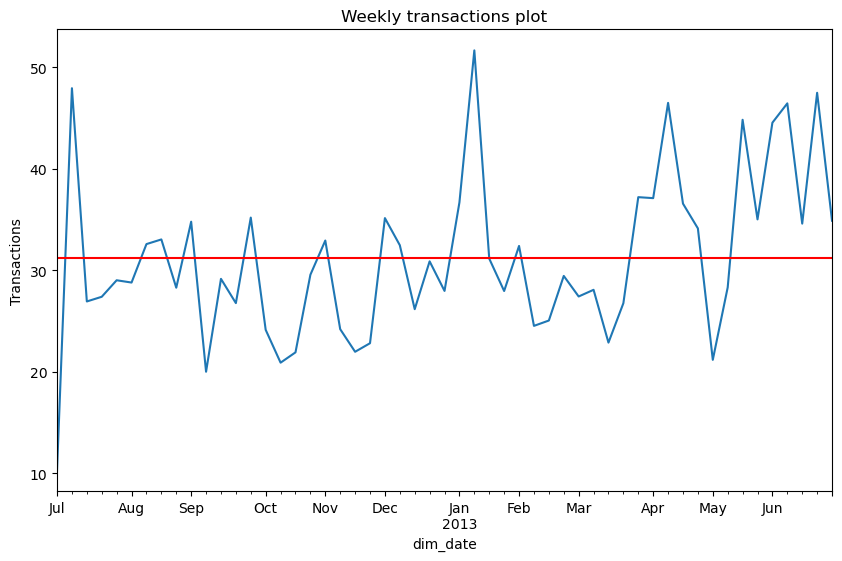

In [16]:
plt.figure(figsize=(10,6))
plt.title('Weekly transactions plot')
plt.xlabel('Date')
plt.ylabel('Transactions')
df_plot['transactions'].plot(kind='line');
plt.axhline(df_plot['transactions'].mean(), color='r');

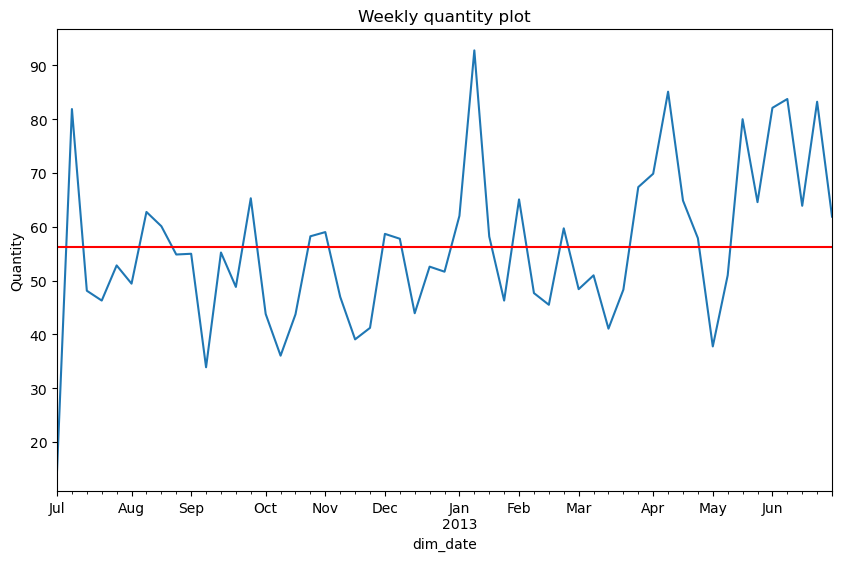

In [17]:
plt.figure(figsize=(10,6))
plt.title('Weekly quantity plot')
plt.xlabel('Date')
plt.ylabel('Quantity')
df_plot['QTY'].plot(kind='line');
plt.axhline(df_plot['QTY'].mean(), color='r');

The best weeks for activities on the website happened in the month of July 2012, January 2013 and April 2013 with July 2013 having the highest average number of sessions while the average number transactions and quantity sold peaked in January 2013. 

Investigation into the reasons for the peaks in the averages for the best months could be used to improve the sales on the website. It is noteworthy to observe that there are as many average weekly performances above the overall average weekly performance as there are below the overall average weekly. 

#### Exploring the non numerical columns

The customer's choice of browser or device can affect their browsing experience depending on that browsers compatibility with the website and the performance of the device. This can affect the number of sessions and transaction rates overall. The analysis of both data columns is done below.

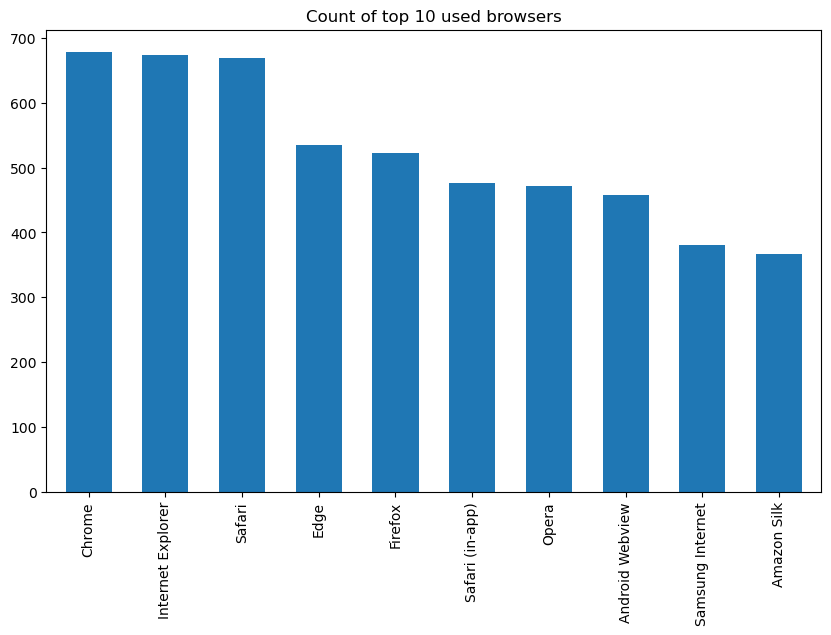

In [18]:
# Finding the top 10 used browsers

plt.figure(figsize=(10,6))
plt.title('Count of top 10 used browsers')
session_data['dim_browser'].value_counts().head(10).plot(kind='bar', width=0.6);

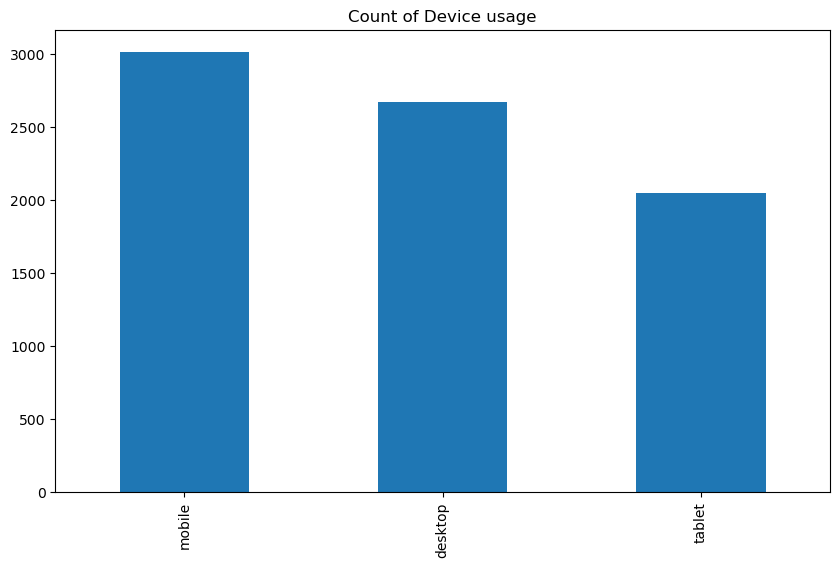

In [19]:
plt.figure(figsize=(10,6))
plt.title('Count of Device usage')
session_data['dim_deviceCategory'].value_counts().plot.bar();

Mobile devices had the most activity on the retail website besides desktop devices so it would be important if the website is suitable for mobile devices that use browsers that are widely used like the ones illustrated above for android and Windows OS systems since most customers are on their phones perhaps because of the convenience it offers. 

Mobile device users could also be browsing around the website more than desktop and tablet users and it would be good to know the conversion rates for the device types to know how to improve the customer experience for potential buyers especially those who use mobile devices.

A breakdown of transactions generated by each device type aggregated monthly is explored further below.

In [20]:
df_agg = session_data.groupby(['dim_date','dim_deviceCategory']).mean()
df_agg = df_agg.reset_index()

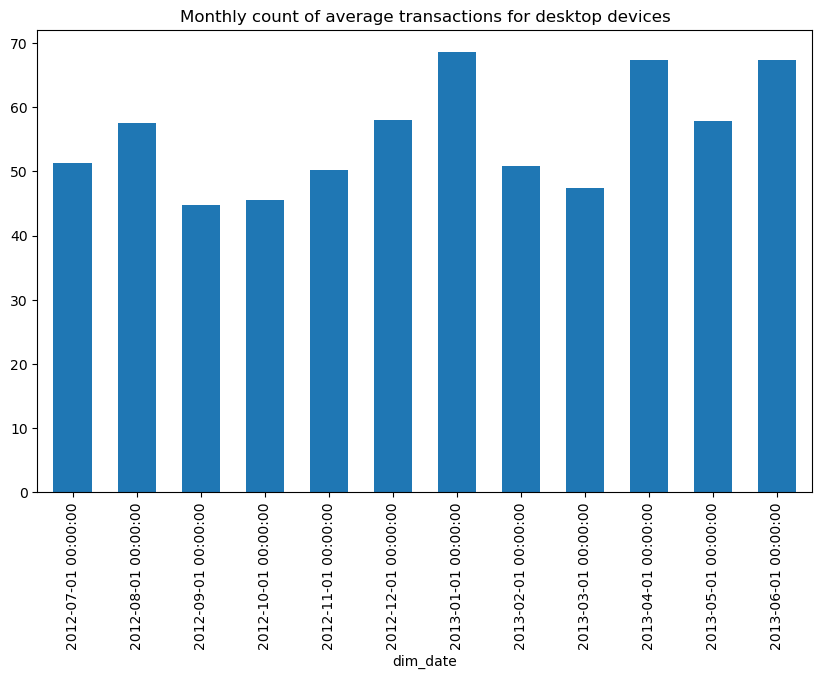

In [21]:
df = df_agg[df_agg['dim_deviceCategory']=='desktop'].set_index('dim_date')

plt.figure(figsize=(10,6))
plt.title('Monthly count of average transactions for desktop devices')
df['transactions'].resample('MS').mean().plot(kind='bar', width=0.6);

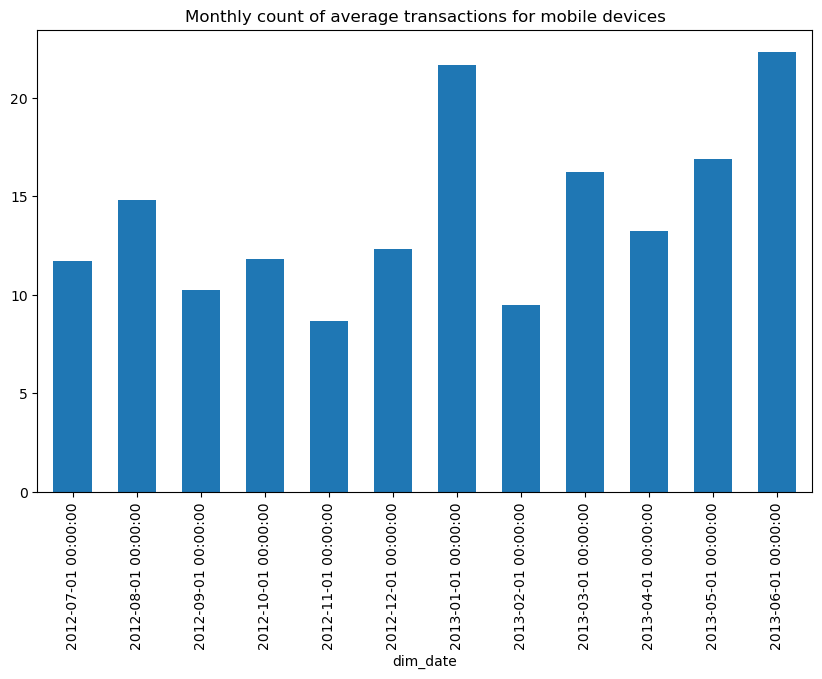

In [22]:
df = df_agg[df_agg['dim_deviceCategory']=='mobile'].set_index('dim_date')

plt.figure(figsize=(10,6))
plt.title('Monthly count of average transactions for mobile devices')
df['transactions'].resample('MS').mean().plot(kind='bar', width=0.6);

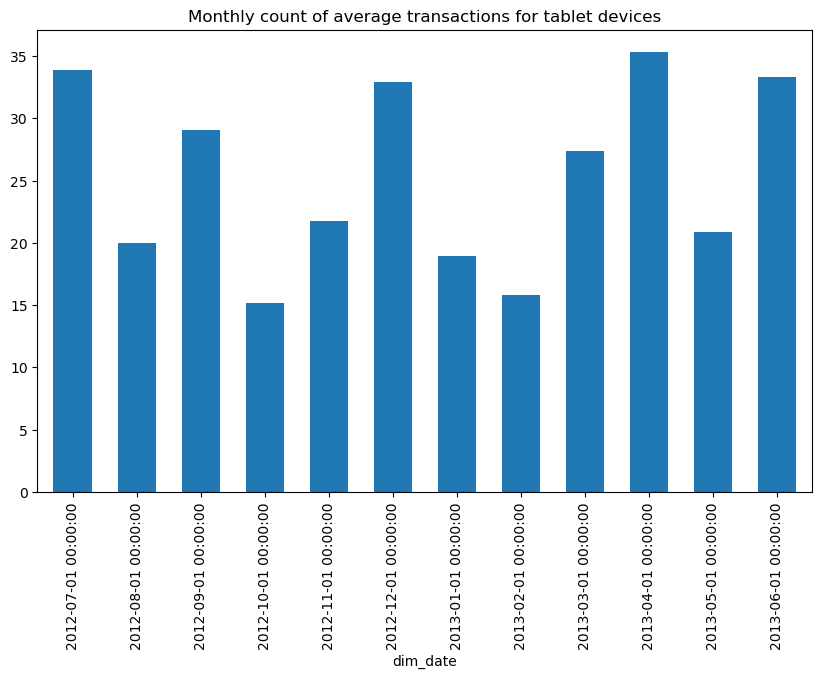

In [23]:
df = df_agg[df_agg['dim_deviceCategory']=='tablet'].set_index('dim_date')

plt.figure(figsize=(10,6))
plt.title('Monthly count of average transactions for tablet devices')
df['transactions'].resample('MS').mean().plot(kind='bar', width=0.6);

From the plots above the best average number of transactions for desktops occurred in January 2013. For mobile and tablet devices their best averages occurred in June and May of the same year. The averge transaction data for desktop devices appear to be increasing from the previous year. Overall desktop devices accounted for the most quantity purchased for the 2012 2013 period as indicated below. 

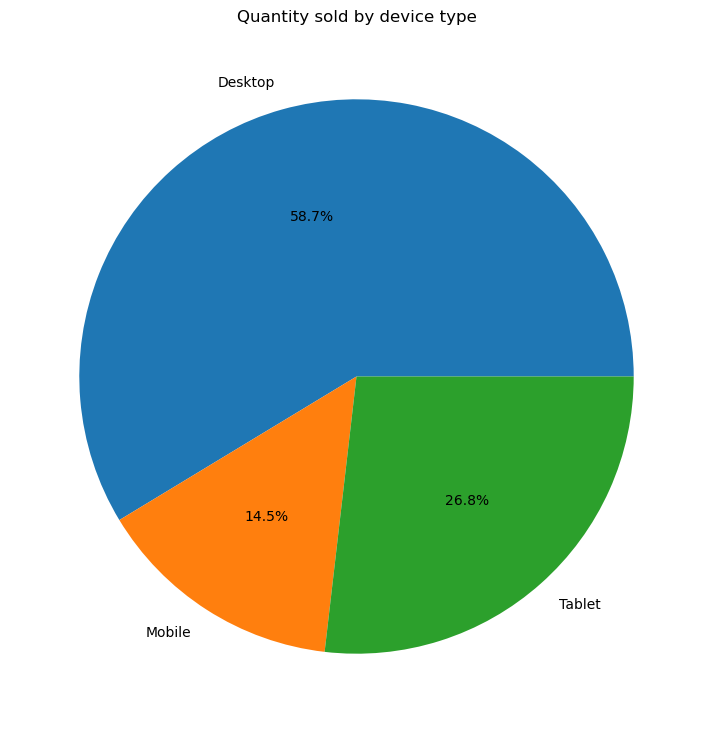

In [24]:
mean_desk = df_agg[df_agg['dim_deviceCategory']=='desktop']['QTY'].mean()
mean_mobile = df_agg[df_agg['dim_deviceCategory']=='mobile']['QTY'].mean()
mean_tablet = df_agg[df_agg['dim_deviceCategory']=='tablet']['QTY'].mean()

plt.figure(figsize=(10,9))
plt.title('Quantity sold by device type')
plt.pie(x=[mean_desk,mean_mobile,mean_tablet], labels=['Desktop','Mobile','Tablet'], autopct='%1.1f%%');

#### Analysis based on conversion rates

An additional feature will be added to the dataset ECR (the fraction of sessions that turn into transactions for a given time period). Analysis with this additional feature is done below   

In [25]:
# Calculating the ECR column

session_data['ECR'] = (session_data['transactions'] / session_data['sessions'])*100
session_data.head()

,dim_browser,dim_deviceCategory,dim_date,sessions,transactions,QTY,ECR
0,Safari,tablet,2012-07-01,2928,127,221,4.337432
1,Internet Explorer,desktop,2012-07-01,1106,28,0,2.531646
2,Chrome,tablet,2012-07-01,474,3,13,0.632911
3,Amazon Silk,tablet,2012-07-01,235,4,5,1.702128
4,Internet Explorer,mobile,2012-07-01,178,6,11,3.370787


In [26]:
df = session_data[['dim_date','ECR']].set_index('dim_date').resample('M').mean()

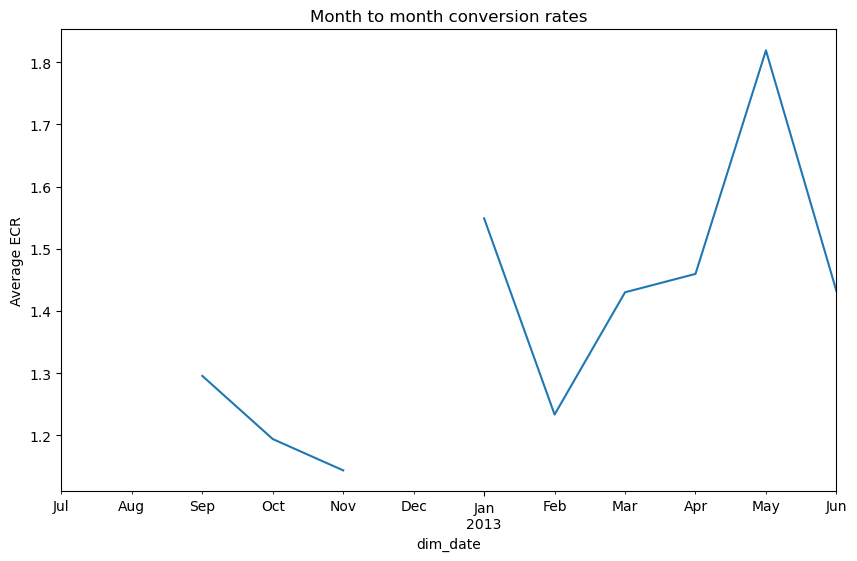

In [27]:
plt.figure(figsize=(10,6))
plt.title('Month to month conversion rates')
plt.ylabel('Average ECR')
# plt.ylim(0.1,1.8)
df['ECR'].plot(kind='line');

There is appears to be an increasing average monthly conversion rate with its highest peaks in May 2013 and later drops in June of the same year. The plots below will summarize the website's performance based on device category

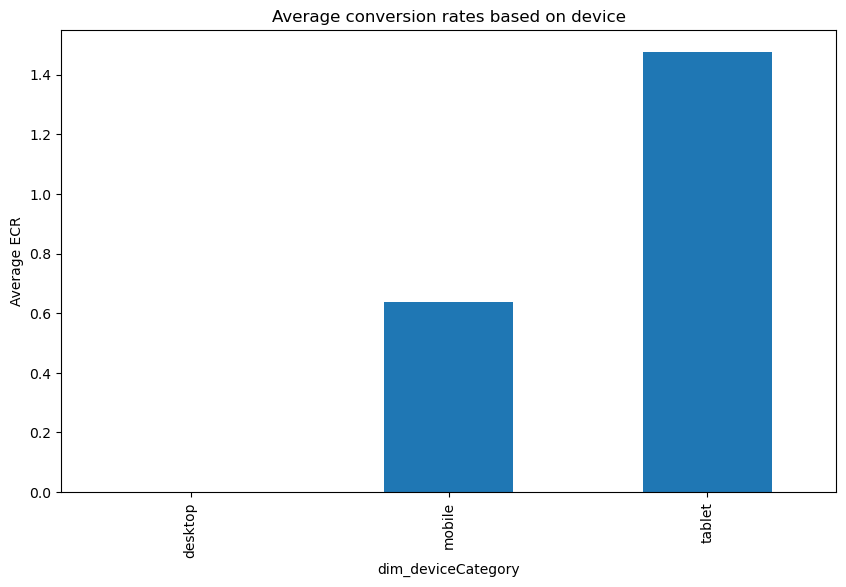

In [28]:
plt.figure(figsize=(10,6))
plt.title('Average conversion rates based on device')
plt.ylabel('Average ECR')
session_data.groupby('dim_deviceCategory').mean()['ECR'].plot(kind='bar');

Overall the conversion rates for tablets had the highest average value. More customers compared to the other device types had sessions that lead to more transactions. The desktop users which accounted for the most transactions and sessions peharps had less sessions compared to transactions numbers overall because they were completing their purchases rather than browing around.

Below the dataset containing the conversion rates is aggregated by month and device category

#### Analysis of data based on month of the year

In [29]:
# Extracting the month from the date column

import datetime as dt

session_data['Month'] = session_data['dim_date'].dt.strftime('%B')
session_data.head()

,dim_browser,dim_deviceCategory,dim_date,sessions,transactions,QTY,ECR,Month
0,Safari,tablet,2012-07-01,2928,127,221,4.337432,July
1,Internet Explorer,desktop,2012-07-01,1106,28,0,2.531646,July
2,Chrome,tablet,2012-07-01,474,3,13,0.632911,July
3,Amazon Silk,tablet,2012-07-01,235,4,5,1.702128,July
4,Internet Explorer,mobile,2012-07-01,178,6,11,3.370787,July


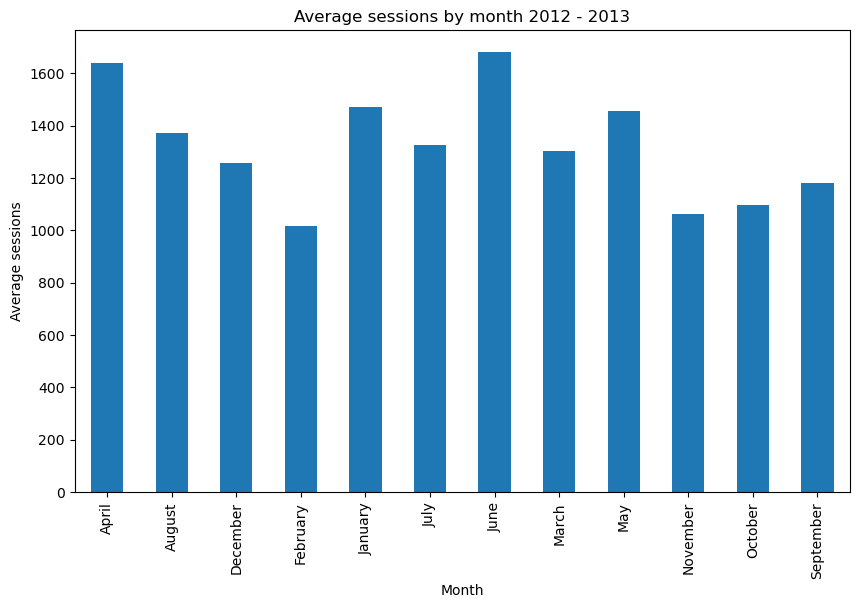

In [30]:
plt.figure(figsize=(10,6))
plt.ylabel('Average sessions')
plt.title('Average sessions by month 2012 - 2013')
session_data.groupby('Month').mean()['sessions'].plot(kind='bar');

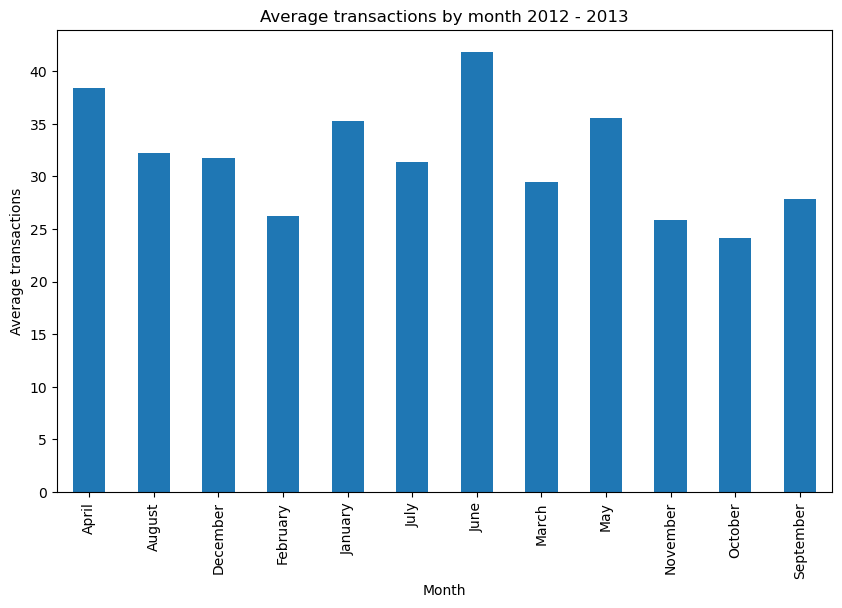

In [31]:
plt.figure(figsize=(10,6))
plt.ylabel('Average transactions')
plt.title('Average transactions by month 2012 - 2013')
session_data.groupby('Month').mean()['transactions'].plot(kind='bar');

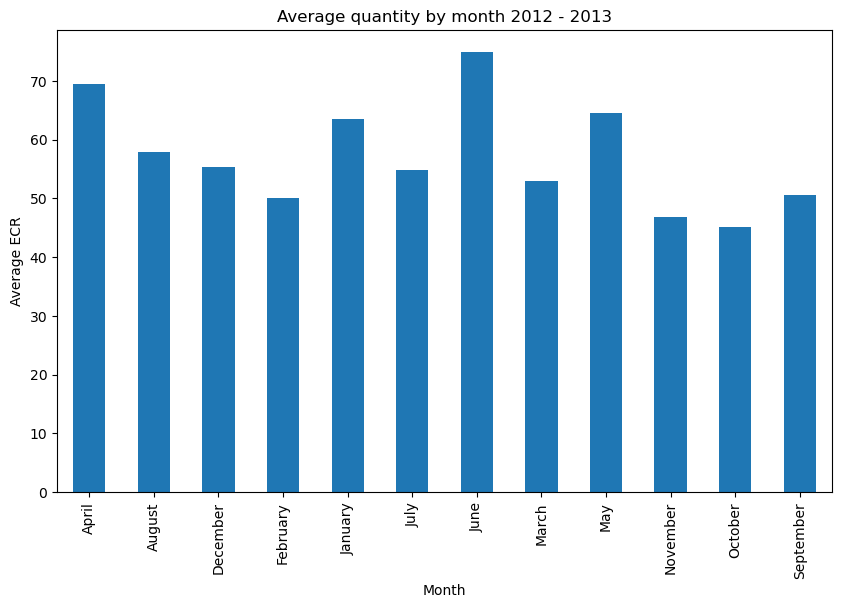

In [32]:
plt.figure(figsize=(10,6))
plt.ylabel('Average ECR')
plt.title('Average quantity by month 2012 - 2013')
session_data.groupby('Month').mean()['QTY'].plot(kind='bar');

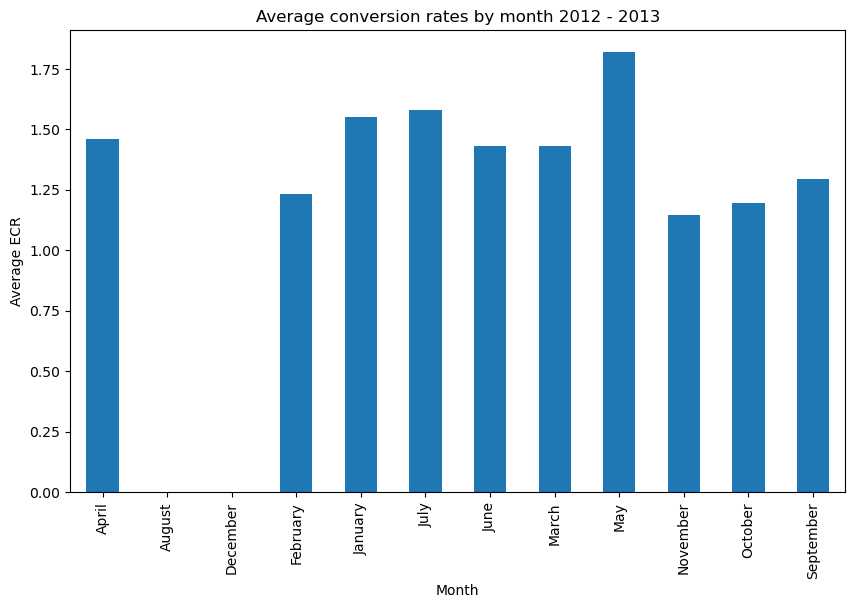

In [33]:

plt.figure(figsize=(10,6))
plt.ylabel('Average ECR')
plt.title('Average conversion rates by month 2012 - 2013')
session_data.groupby('Month').mean()['ECR'].plot(kind='bar');

For the 2012 2013 period the month that had the best average number of sessions, transactions and quantity purchased occured in the month of June while for the average conversion rates it was in the month of May. This indicates that May and June are the peak months for activities on the retail website. 

#### Month device aggregation analysis for the numerical columns

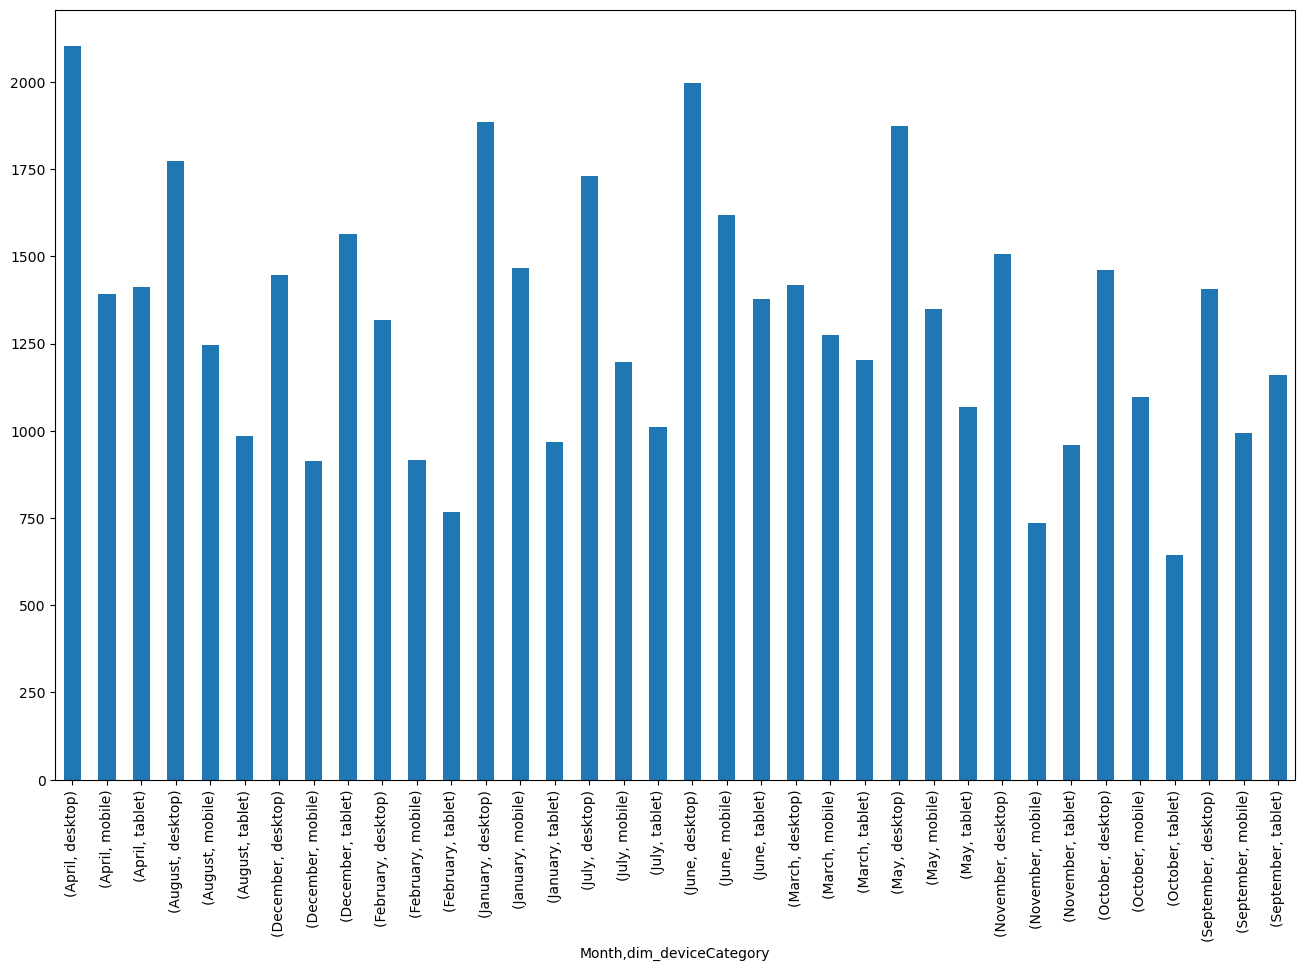

In [34]:
plt.figure(figsize=(16,10))
session_data.groupby(['Month', 'dim_deviceCategory']).mean()['sessions'].plot(kind='bar');

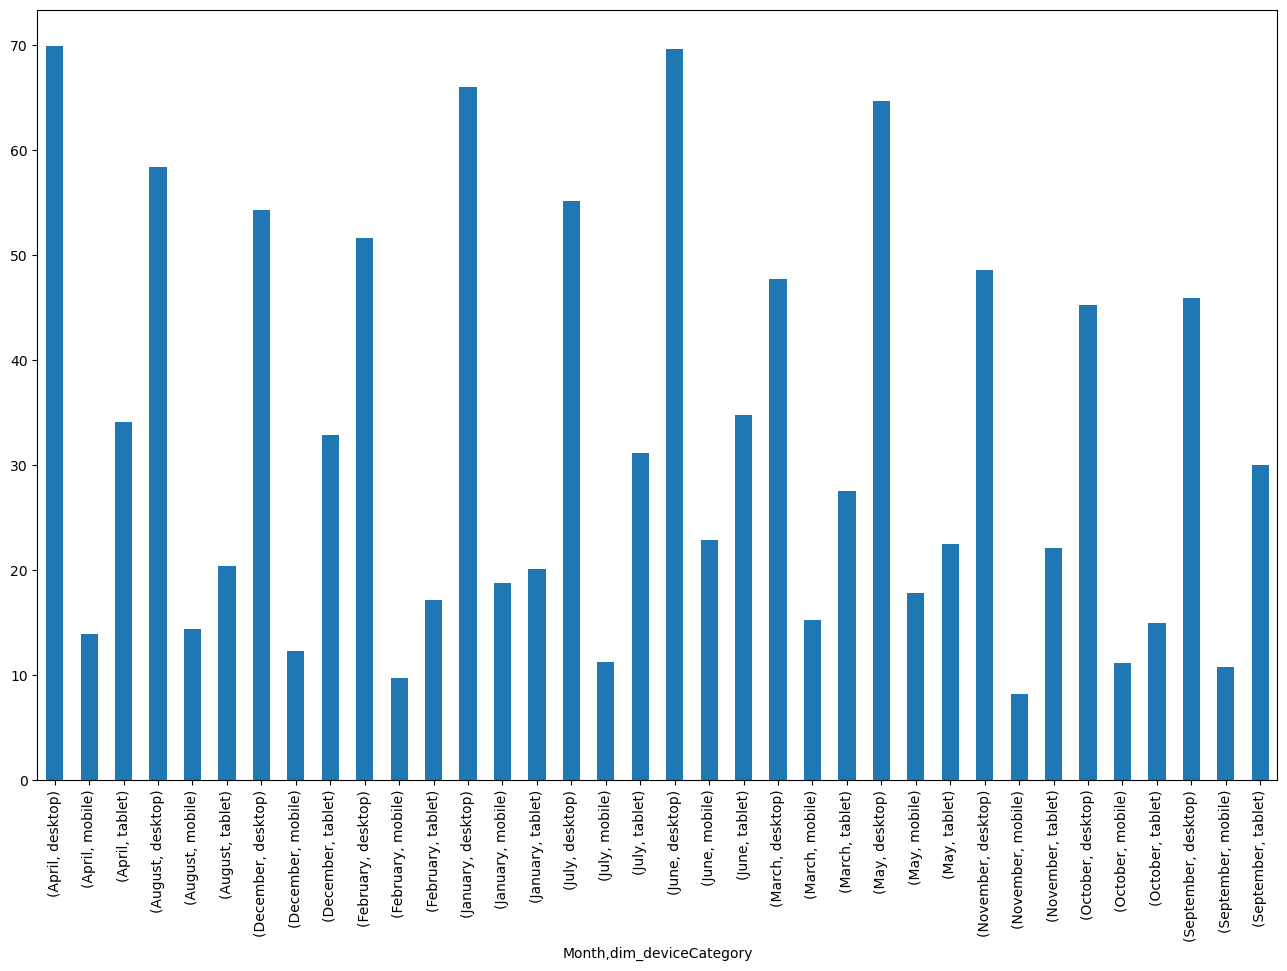

In [35]:
plt.figure(figsize=(16,10))
session_data.groupby(['Month', 'dim_deviceCategory']).mean()['transactions'].plot(kind='bar');

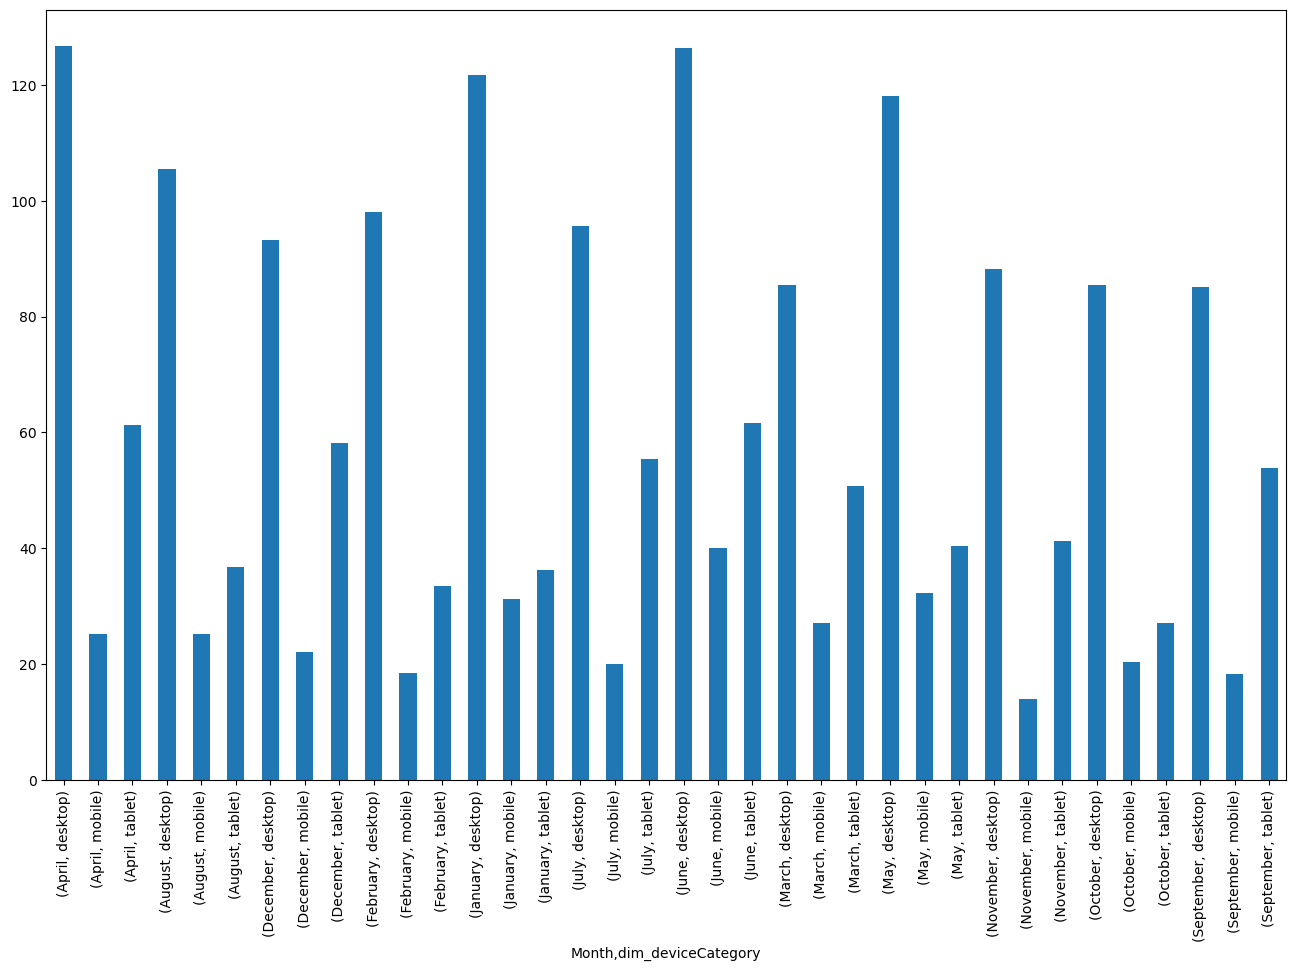

In [36]:
plt.figure(figsize=(16,10))
session_data.groupby(['Month', 'dim_deviceCategory']).mean()['QTY'].plot(kind='bar');

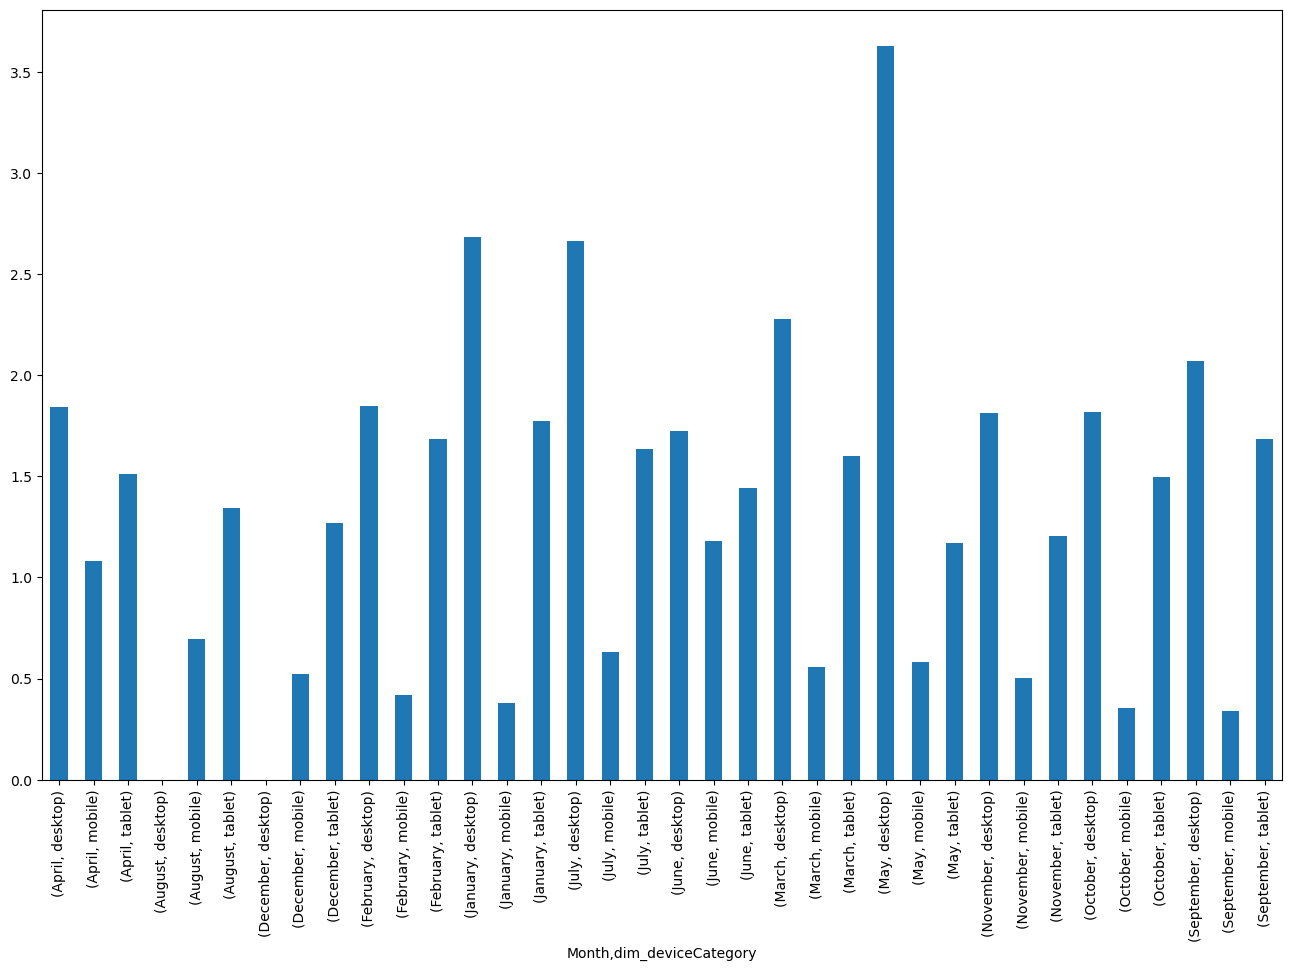

In [37]:
plt.figure(figsize=(16,10))
session_data.groupby(['Month', 'dim_deviceCategory']).mean()['ECR'].plot(kind='bar');

For desktops users the best average number of sessions occurred in the month of April and June which is the same months for the best average numbers for transactions and quantity ordered which also had high numbers in January and May also. The best months for conversion rates where in May. Similar patterns happened for mobile devices and tablets which suggets that the website's best revenue period is in the second period of the year with desktop devices driving the most sales. 

Below is a table that has the website data aggregated by months of the year and device categories.  

In [38]:
df_1 = session_data.sort_values(by=['sessions','transactions','QTY','ECR'], ascending=False)
df_2 = df_1.sort_values('dim_date')
df_2 = df_2.groupby(['Month','dim_deviceCategory'], as_index=False, sort=False).mean()
df_2

,Month,dim_deviceCategory,sessions,transactions,QTY,ECR
0,July,desktop,1729.015464,55.159794,95.603093,2.664596
1,July,mobile,1198.441048,11.248908,19.899563,0.633303
2,July,tablet,1010.936306,31.108280,55.414013,1.634639
3,August,desktop,1774.113122,58.425339,105.502262,NaN
4,August,mobile,1246.859729,14.321267,25.212670,0.696034
5,August,tablet,986.356688,20.394904,36.687898,1.343667
6,September,desktop,1406.036082,45.865979,85.087629,2.070833
7,September,mobile,994.094595,10.725225,18.243243,0.341772
8,September,tablet,1158.856164,29.993151,53.897260,1.686147
9,October,mobile,1095.637615,11.091743,20.394495,0.357051


## Analysing the to cart dataset

In [39]:
tocart_data.head()

,dim_year,dim_month,addsToCart
0,2012,7,191504
1,2012,8,217666
2,2012,9,123726
3,2012,10,139803
4,2012,11,186572


In [40]:
tocart_data.tail()

,dim_year,dim_month,addsToCart
7,2013,2,135882
8,2013,3,109797
9,2013,4,183842
10,2013,5,136720
11,2013,6,107970


In [41]:
tocart_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   dim_year    12 non-null     int64
 1   dim_month   12 non-null     int64
 2   addsToCart  12 non-null     int64
dtypes: int64(3)
memory usage: 416.0 bytes


In [42]:
# Casting the year and month columns to string

tocart_data['dim_year'] = tocart_data['dim_year'].astype('str')
tocart_data['dim_month'] = tocart_data['dim_month'].astype('str')

In [43]:
tocart_data.head()

,dim_year,dim_month,addsToCart
0,2012,7,191504
1,2012,8,217666
2,2012,9,123726
3,2012,10,139803
4,2012,11,186572


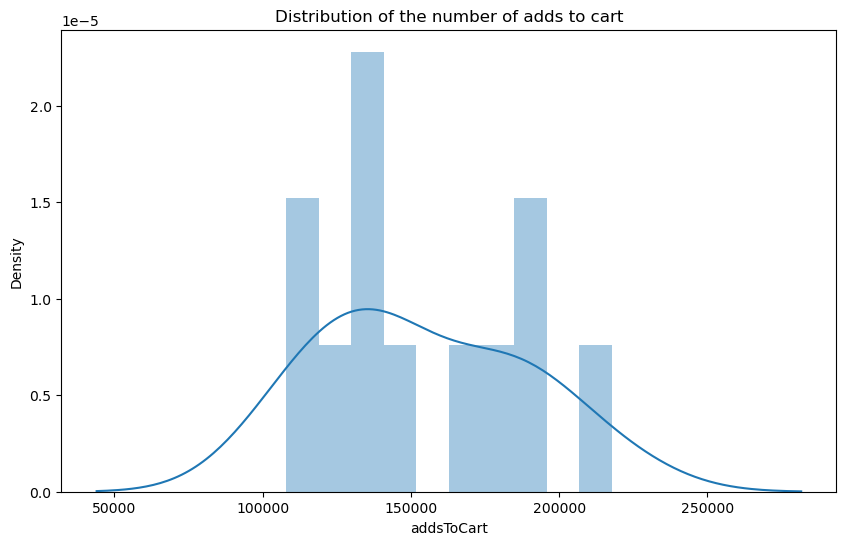

In [44]:
plt.figure(figsize=(10,6))
plt.title('Distribution of the number of adds to cart')
sns.distplot(tocart_data['addsToCart'], bins=10);

The most number of items added to the shopping cart is 125000 items the majority of which were from customers who did not have any transactions

In [45]:
# Creating a year month column

tocart_data['year_month'] = tocart_data['dim_year'] + '-' + tocart_data['dim_month']

In [46]:
tocart_data['year_month'] = pd.to_datetime(tocart_data['year_month'])

In [47]:
# Creating a year month column

tocart_data['Month'] = tocart_data['year_month'].dt.strftime('%B')
tocart_data

,dim_year,dim_month,addsToCart,year_month,Month
0,2012,7,191504,2012-07-01,July
1,2012,8,217666,2012-08-01,August
2,2012,9,123726,2012-09-01,September
3,2012,10,139803,2012-10-01,October
4,2012,11,186572,2012-11-01,November
5,2012,12,168972,2012-12-01,December
6,2013,1,147619,2013-01-01,January
7,2013,2,135882,2013-02-01,February
8,2013,3,109797,2013-03-01,March
9,2013,4,183842,2013-04-01,April


In [48]:
tocart_data.head()

,dim_year,dim_month,addsToCart,year_month,Month
0,2012,7,191504,2012-07-01,July
1,2012,8,217666,2012-08-01,August
2,2012,9,123726,2012-09-01,September
3,2012,10,139803,2012-10-01,October
4,2012,11,186572,2012-11-01,November


In [49]:
df = tocart_data.set_index('Month')
# plt.plot(tocart_data['year_month'], tocart_data['addsToCart'])

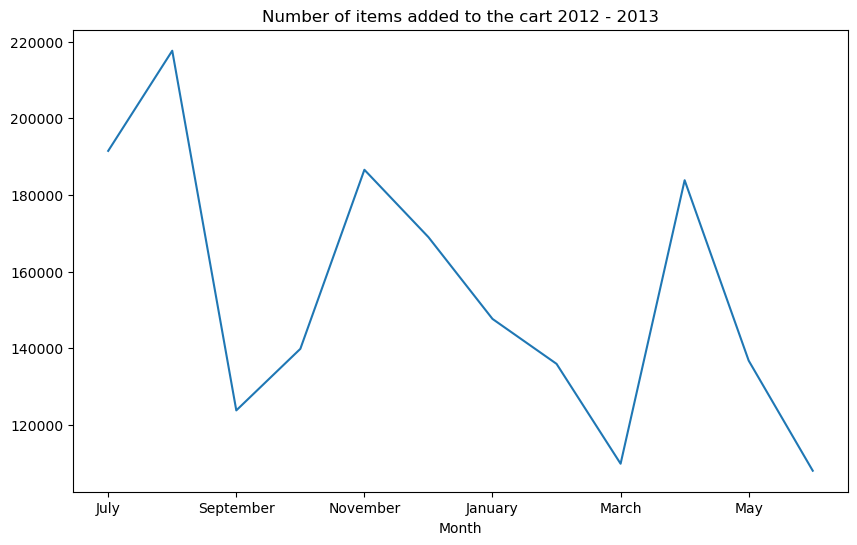

In [50]:
plt.figure(figsize=(10,6))
plt.title('Number of items added to the cart 2012 - 2013')
plt.xlabel('Addtocart')
df['addsToCart'].plot(kind='line');

The month with the highest numbers of items added to cart was in August 2012. November and April also experienced peak numbers as well. The lowest numbers occured in September and March. The third and fourth quarter of the 2012 - 2013 period had the best performance in general or customers that added items to their carts.

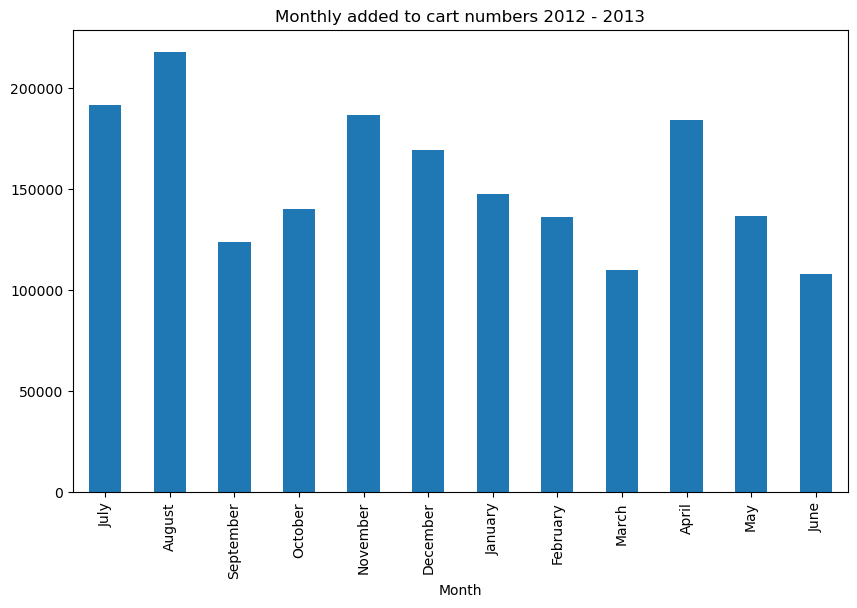

In [51]:
plt.figure(figsize=(10,6))
plt.title('Monthly added to cart numbers 2012 - 2013')
tocart_data.set_index('Month')['addsToCart'].plot(kind='bar');

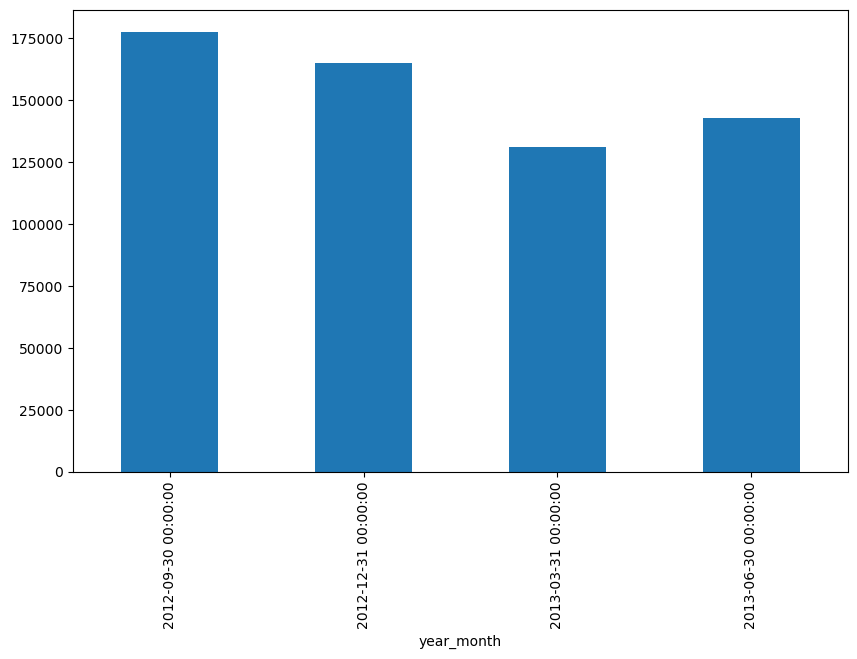

In [53]:
plt.figure(figsize=(10,6))
tocart_data.set_index('year_month').resample('Q').mean()['addsToCart'].plot(kind='bar');

Other features such as the absolute and relative difference features derived from the addsToCart column will be added to the dataset. They will be used to determine the percentage change and growth rate of customer cart items from month to month

In [54]:
# Creating the absolute difference of the addstocart column

tocart_data['adds_abs_diff'] = abs(tocart_data['addsToCart'].diff())

In [55]:
# Creating the relative difference of the addstocart column

def difference(seq1, seq2):
    
    for i in range(len(tocart_data)):
        
        try:
            tocart_data['adds_rel_diff'][i] = seq1[i] / seq2[i-1]
        except:
            tocart_data['adds_rel_diff'] = np.nan
            
difference(tocart_data['adds_abs_diff'], tocart_data['addsToCart'])        

In [56]:
tocart_data

,dim_year,dim_month,addsToCart,year_month,Month,adds_abs_diff,adds_rel_diff
0,2012,7,191504,2012-07-01,July,NaN,NaN
1,2012,8,217666,2012-08-01,August,26162.0,0.136613
2,2012,9,123726,2012-09-01,September,93940.0,0.431579
3,2012,10,139803,2012-10-01,October,16077.0,0.129940
4,2012,11,186572,2012-11-01,November,46769.0,0.334535
5,2012,12,168972,2012-12-01,December,17600.0,0.094334
6,2013,1,147619,2013-01-01,January,21353.0,0.126370
7,2013,2,135882,2013-02-01,February,11737.0,0.079509
8,2013,3,109797,2013-03-01,March,26085.0,0.191968
9,2013,4,183842,2013-04-01,April,74045.0,0.674381


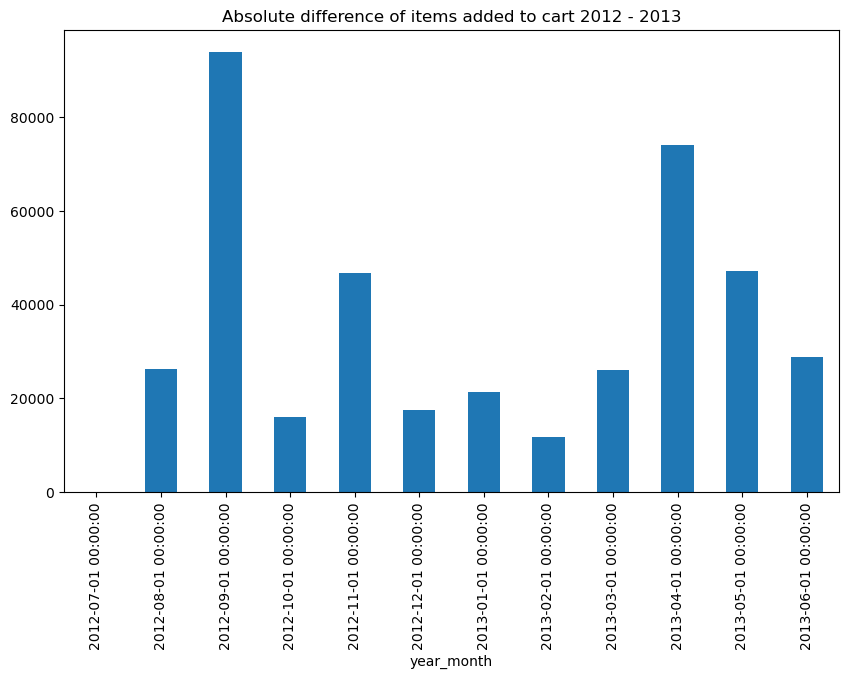

In [57]:
plt.figure(figsize=(10,6))
plt.title('Absolute difference of items added to cart 2012 - 2013')
tocart_data.set_index('year_month')['adds_abs_diff'].plot(kind='bar');

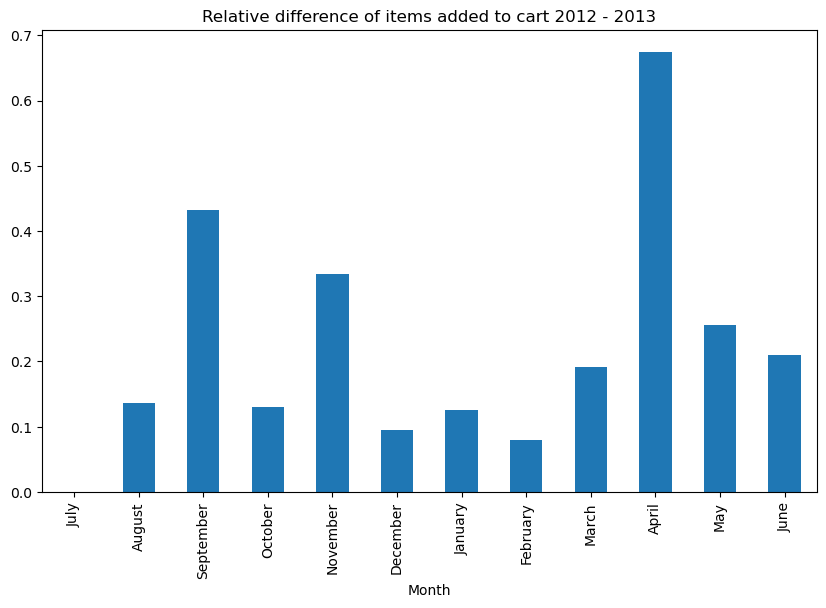

In [58]:
plt.figure(figsize=(10,6))
plt.title('Relative difference of items added to cart 2012 - 2013')
tocart_data.set_index('Month')['adds_rel_diff'].plot(kind='bar');

The largest changes in the number of items customers added to their carts for the 2012 2013 period was a 43% decrease from August to September and a 67% increase from March to April. Conversion rates during the second quarter with the increase in items added to cart peharps translates to actual transactions that took place during the the quarter in 2013. 

Saving the a Month Device aggregation and the Month over Month comparison addToCart datasets to an excel file

In [59]:
# Using excel writer to write the files

writer = pd.ExcelWriter(path='case_data.xlsx')
df_2.to_excel(writer, sheet_name='Month device aggregation')
tocart_data.to_excel(writer, sheet_name='Month to month add to cart')
writer.save()

### Recommendations

The metrics from the website appear to be stable with no decreasing trends in general however the averages can be improved on with the following recommendations

Observing the data patterns of sessions, transations and conversion rates the retail website appears to have some seasonality pattern in its performance. A good way to drive sales to this regard is to offer promotions during periods of lower sales perhaps during the 4th quarter of the year. Seasonal peak patterns can also be driven by items that are in season these should be made available during the year when they are in demand. 

Desktop users accounted for the most transactions for the duration of the dataset. To give them a good shopping experience the website should be compatible with the browsers commonly used like Chrome, Firefox and Edge. For users that are likely to surf around before making purchases their shopping experience can be improved by making the webite portable device compatible. Promotions on item sales for downloading and using the web app perhaps is a good way to increase transactions with mobile users. Good web hosting and balancing the web traffic loads also will prevent outages during peak periods.

Advertisement campaigns using social media especially for mobile users as well as search engine optimization can be use to drive more traffic to the website. This can improve the number of customers that add items to their carts as well as transaction rates. Customer surveys about items they would want to see displayed on the web pages and the ease of navigation of the website would help drive sales on the site. 

